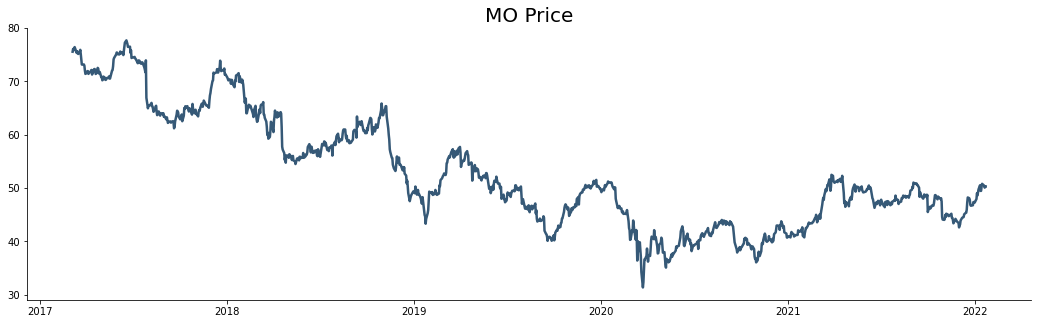

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('MO.csv', index_col='Date', parse_dates=True)

# Visualize
plt.title('MO Price', size=20)
plt.plot(df);

In [2]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [3]:
df

,MO
Date,
2017-03-06,75.58
2017-03-07,76.10
2017-03-08,75.84
2017-03-09,76.19
2017-03-10,76.45
...,...
2022-01-14,50.81
2022-01-18,50.46
2022-01-19,50.09


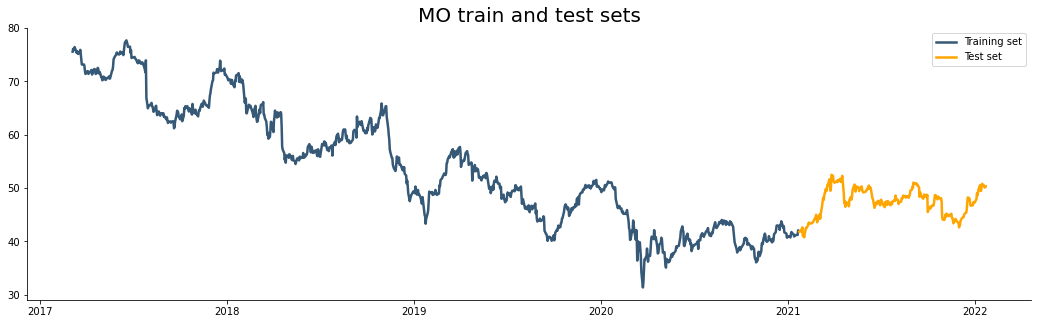

In [4]:
test_size = 253


df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('MO train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [5]:
from fbprophet import Prophet as proph

In [6]:
df_train

,MO
Date,
2017-03-06,75.58
2017-03-07,76.10
2017-03-08,75.84
2017-03-09,76.19
2017-03-10,76.45
...,...
2021-01-14,41.11
2021-01-15,41.20
2021-01-19,41.23


In [7]:
df_train.reset_index(inplace=True)

In [8]:
df_test

,MO
Date,
2021-01-22,41.83
2021-01-25,41.96
2021-01-26,42.23
2021-01-27,41.82
2021-01-28,42.65
...,...
2022-01-14,50.81
2022-01-18,50.46
2022-01-19,50.09


In [9]:
df_test.reset_index(inplace=True)

In [10]:
# Rename the columns [Date,AAPL] to [ds, y]

ts = df_train

ts = df_train.rename(columns={'Date': 'ds',
                        'MO': 'y'})

ts_test = df_test.rename(columns={'Date': 'ds',
                        'MO': 'y'})
ts.head(5)


,ds,y
0,2017-03-06,75.58
1,2017-03-07,76.10
2,2017-03-08,75.84
3,2017-03-09,76.19
4,2017-03-10,76.45


In [11]:
x_test = ts_test[['ds']]

In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model = proph(interval_width=0.95,daily_seasonality=True)

In [13]:
# Fit the timeseries into Model
Model.fit(ts)

In [14]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates = Model.make_future_dataframe(periods=759, freq='D')
future_dates.tail()


,ds
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18
1736,2023-02-19


In [15]:
future_dates

,ds
0,2017-03-06
1,2017-03-07
2,2017-03-08
3,2017-03-09
4,2017-03-10
...,...
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18


In [16]:
future_dates= future_dates.loc[future_dates['ds'] >= '2021-01-22']

In [17]:
x_test = pd.DataFrame(x_test)

In [18]:
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [19]:
# Predict the values for future dates and take the head of forecast

predicitons = Model.predict(x_test)


In [20]:
forecast = Model.predict(future_dates)

In [21]:
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
754,2023-02-15,31.304489,18.718740,44.766773,19.542294,42.593962,0.022089,0.022089,0.022089,0.401639,...,0.077342,0.077342,0.077342,-0.456892,-0.456892,-0.456892,0.0,0.0,0.0,31.326578
755,2023-02-16,31.294784,17.133127,44.116903,19.513643,42.602272,-0.104325,-0.104325,-0.104325,0.401639,...,-0.058603,-0.058603,-0.058603,-0.447360,-0.447360,-0.447360,0.0,0.0,0.0,31.190459
756,2023-02-17,31.285078,17.733409,44.203432,19.484993,42.610582,-0.030115,-0.030115,-0.030115,0.401639,...,-0.013064,-0.013064,-0.013064,-0.418690,-0.418690,-0.418690,0.0,0.0,0.0,31.254963
757,2023-02-18,31.275372,17.565884,45.268956,19.456342,42.618893,-0.021042,-0.021042,-0.021042,0.401639,...,-0.050205,-0.050205,-0.050205,-0.372476,-0.372476,-0.372476,0.0,0.0,0.0,31.254330
758,2023-02-19,31.265666,18.173114,44.664017,19.427692,42.633620,0.040725,0.040725,0.040725,0.401639,...,-0.050205,-0.050205,-0.050205,-0.310709,-0.310709,-0.310709,0.0,0.0,0.0,31.306391


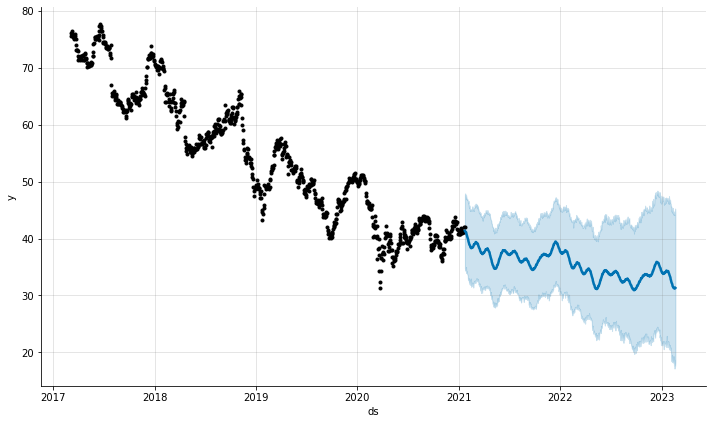

In [22]:
# Use prophet's plot function to plot the predictions

Model.plot(forecast, uncertainty=True)
plt.show()

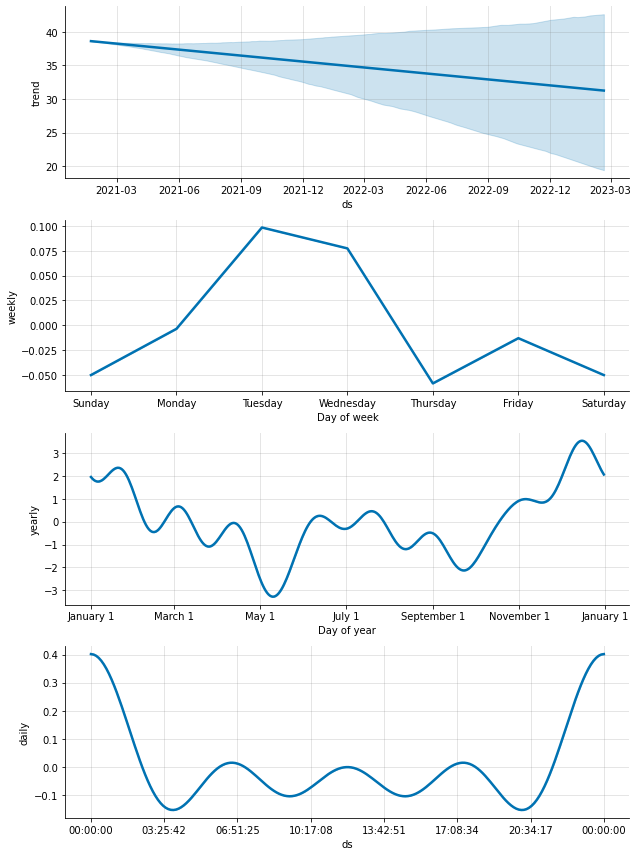

In [23]:
Model.plot_components(forecast)
plt.show()

In [24]:
df_test = pd.concat([df_test,predicitons], axis=1)
df_test

,Date,MO,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,41.83,2021-01-22,38.622602,34.893583,47.717002,38.622602,38.622602,2.711739,2.711739,...,-0.013064,-0.013064,-0.013064,2.323164,2.323164,2.323164,0.0,0.0,0.0,41.334340
1,2021-01-25,41.96,2021-01-25,38.593484,34.880388,47.572072,38.592976,38.593986,2.539453,2.539453,...,-0.003656,-0.003656,-0.003656,2.141470,2.141470,2.141470,0.0,0.0,0.0,41.132937
2,2021-01-26,42.23,2021-01-26,38.583779,34.712567,47.985044,38.581965,38.586113,2.543025,2.543025,...,0.098391,0.098391,0.098391,2.042996,2.042996,2.042996,0.0,0.0,0.0,41.126804
3,2021-01-27,41.82,2021-01-27,38.574073,34.902869,47.041679,38.570582,38.577745,2.405802,2.405802,...,0.077342,0.077342,0.077342,1.926822,1.926822,1.926822,0.0,0.0,0.0,40.979875
4,2021-01-28,42.65,2021-01-28,38.564367,34.301629,47.052595,38.559494,38.569814,2.137423,2.137423,...,-0.058603,-0.058603,-0.058603,1.794387,1.794387,1.794387,0.0,0.0,0.0,40.701790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,50.81,2022-01-14,35.157660,30.369505,44.704036,31.600146,38.779488,2.473957,2.473957,...,-0.013064,-0.013064,-0.013064,2.085381,2.085381,2.085381,0.0,0.0,0.0,37.631616
249,2022-01-18,50.46,2022-01-18,35.118837,30.469404,45.242116,31.515674,38.821136,2.802764,2.802764,...,0.098391,0.098391,0.098391,2.302734,2.302734,2.302734,0.0,0.0,0.0,37.921601
250,2022-01-19,50.09,2022-01-19,35.109131,30.466272,45.398145,31.495058,38.827119,2.811922,2.811922,...,0.077342,0.077342,0.077342,2.332942,2.332942,2.332942,0.0,0.0,0.0,37.921053
251,2022-01-20,50.33,2022-01-20,35.099426,30.466968,45.257849,31.474442,38.826752,2.691831,2.691831,...,-0.058603,-0.058603,-0.058603,2.348795,2.348795,2.348795,0.0,0.0,0.0,37.791256


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,38.622602,34.827680,47.756909,38.622602,38.622602,2.711739,2.711739,2.711739,0.401639,...,-0.013064,-0.013064,-0.013064,2.323164,2.323164,2.323164,0.0,0.0,0.0,41.334340
1,2021-01-23,38.612896,34.442538,47.934165,38.612896,38.612986,2.633267,2.633267,2.633267,0.401639,...,-0.050205,-0.050205,-0.050205,2.281833,2.281833,2.281833,0.0,0.0,0.0,41.246163
2,2021-01-24,38.603190,34.411857,47.490191,38.603190,38.603824,2.572690,2.572690,2.572690,0.401639,...,-0.050205,-0.050205,-0.050205,2.221256,2.221256,2.221256,0.0,0.0,0.0,41.175880
3,2021-01-25,38.593484,34.269406,46.913442,38.593350,38.594978,2.539453,2.539453,2.539453,0.401639,...,-0.003656,-0.003656,-0.003656,2.141470,2.141470,2.141470,0.0,0.0,0.0,41.132937
4,2021-01-26,38.583779,34.963635,47.697714,38.582018,38.587161,2.543025,2.543025,2.543025,0.401639,...,0.098391,0.098391,0.098391,2.042996,2.042996,2.042996,0.0,0.0,0.0,41.126804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2023-02-15,31.304489,18.718740,44.766773,19.542294,42.593962,0.022089,0.022089,0.022089,0.401639,...,0.077342,0.077342,0.077342,-0.456892,-0.456892,-0.456892,0.0,0.0,0.0,31.326578
755,2023-02-16,31.294784,17.133127,44.116903,19.513643,42.602272,-0.104325,-0.104325,-0.104325,0.401639,...,-0.058603,-0.058603,-0.058603,-0.447360,-0.447360,-0.447360,0.0,0.0,0.0,31.190459
756,2023-02-17,31.285078,17.733409,44.203432,19.484993,42.610582,-0.030115,-0.030115,-0.030115,0.401639,...,-0.013064,-0.013064,-0.013064,-0.418690,-0.418690,-0.418690,0.0,0.0,0.0,31.254963
757,2023-02-18,31.275372,17.565884,45.268956,19.456342,42.618893,-0.021042,-0.021042,-0.021042,0.401639,...,-0.050205,-0.050205,-0.050205,-0.372476,-0.372476,-0.372476,0.0,0.0,0.0,31.254330


In [26]:
mean_squared_error(df_test.MO,df_test.yhat,squared=False)

10.771266134670466